In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import accuracy_score

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('df2.csv')
df.columns

#to binarize: 'breed1','breed2','gender','color1','color2', 'color 3', 'vaccinated','dewormed','sterilized','health','state'

Index(['Unnamed: 0', 'Type', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1',
       'Color2', 'Color3', 'Single_Colored', 'Double_Colored',
       'Triple_Colored', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Group', 'Fee', 'State', 'VideoAmt',
       'Length_Description', 'PhotoAmt', 'Meaningless_Name', 'Has_Name',
       'RescuerID_count', 'state_gdp', 'state_population', 'AdoptionSpeed'],
      dtype='object')

In [3]:
df['Breed1'] = pd.Categorical(df.Breed1)
df['Breed2'] = pd.Categorical(df.Breed2)
df['Gender'] = pd.Categorical(df.Gender)
df['Color1'] = pd.Categorical(df.Color1)
df['Color2'] = pd.Categorical(df.Color2)
df['Color3'] = pd.Categorical(df.Color3)
df['Vaccinated'] = pd.Categorical(df.Vaccinated)
df['Dewormed'] = pd.Categorical(df.Dewormed)
df['Sterilized'] = pd.Categorical(df.Sterilized)
df['Health'] = pd.Categorical(df.Health)
df['State'] = pd.Categorical(df.State)
df['Type'] = pd.Categorical(df.Type)

In [4]:
def binarize_categories(data):
    for column in data.select_dtypes('category'):
        if len(data[column].unique()) == 2:
            data[column] = pd.get_dummies(data[column], dtype='int64')
        else:
            data = pd.get_dummies(data, prefix=column, columns=[column], drop_first=True)
    return data
#binarizing columns
df = binarize_categories(df)

In [5]:
df.columns

Index(['Unnamed: 0', 'Type', 'Age', 'Single_Colored', 'Double_Colored',
       'Triple_Colored', 'MaturitySize', 'FurLength', 'Quantity', 'Group',
       ...
       'State_4', 'State_5', 'State_6', 'State_7', 'State_8', 'State_9',
       'State_10', 'State_11', 'State_12', 'State_13'],
      dtype='object', length=369)

In [6]:
cols = df.columns.tolist()
df = df[['Type', 'Age','Single_Colored', 'Double_Colored','Triple_Colored', 'MaturitySize', 'FurLength', 'Quantity',
 'Group', 'Fee', 'VideoAmt', 'Length_Description', 'PhotoAmt', 'Meaningless_Name', 'Has_Name', 'RescuerID_count', 'state_gdp',
 'state_population', 'Breed1_1', 'Breed1_2', 'Breed1_3', 'Breed1_4', 'Breed1_5', 'Breed1_6', 'Breed1_7', 'Breed1_8',
 'Breed1_9', 'Breed1_10', 'Breed1_11', 'Breed1_12', 'Breed1_13', 'Breed1_14', 'Breed1_15', 'Breed1_16', 'Breed1_17',
 'Breed1_18', 'Breed1_19', 'Breed1_20', 'Breed1_21', 'Breed1_22','Breed1_23', 'Breed1_24','Breed1_25','Breed1_26', 'Breed1_27',
 'Breed1_28', 'Breed1_29', 'Breed1_30', 'Breed1_31', 'Breed1_32', 'Breed1_33', 'Breed1_34', 'Breed1_35', 'Breed1_36', 'Breed1_37',
 'Breed1_38', 'Breed1_39', 'Breed1_40', 'Breed1_41','Breed1_42', 'Breed1_43', 'Breed1_44', 'Breed1_45', 'Breed1_46', 'Breed1_47',
 'Breed1_48', 'Breed1_49', 'Breed1_50', 'Breed1_51', 'Breed1_52', 'Breed1_53', 'Breed1_54', 'Breed1_55', 'Breed1_56', 'Breed1_57',
 'Breed1_58', 'Breed1_59', 'Breed1_60', 'Breed1_61', 'Breed1_62', 'Breed1_63', 'Breed1_64', 'Breed1_65', 'Breed1_66', 'Breed1_67',
 'Breed1_68', 'Breed1_69', 'Breed1_70', 'Breed1_71', 'Breed1_72', 'Breed1_73', 'Breed1_74', 'Breed1_75', 'Breed1_76', 'Breed1_77',
 'Breed1_78', 'Breed1_79', 'Breed1_80', 'Breed1_81', 'Breed1_82', 'Breed1_83', 'Breed1_84', 'Breed1_85', 'Breed1_86', 'Breed1_87',
 'Breed1_88', 'Breed1_89', 'Breed1_90', 'Breed1_91', 'Breed1_92', 'Breed1_93', 'Breed1_94', 'Breed1_95', 'Breed1_96', 'Breed1_97',
 'Breed1_98', 'Breed1_99', 'Breed1_100', 'Breed1_101', 'Breed1_102', 'Breed1_103', 'Breed1_104', 'Breed1_105', 'Breed1_106', 'Breed1_107',
 'Breed1_108', 'Breed1_109', 'Breed1_110', 'Breed1_111', 'Breed1_112', 'Breed1_113', 'Breed1_114', 'Breed1_115', 'Breed1_116', 'Breed1_117', 'Breed1_118', 'Breed1_119', 'Breed1_120', 'Breed1_121', 'Breed1_122', 'Breed1_123', 'Breed1_124', 'Breed1_125', 'Breed1_126', 'Breed1_127', 'Breed1_128', 'Breed1_129', 'Breed1_130',
 'Breed1_131', 'Breed1_132', 'Breed1_133', 'Breed1_134', 'Breed1_135', 'Breed1_136','Breed1_137', 'Breed1_138', 'Breed1_139', 'Breed1_140',
 'Breed1_141', 'Breed1_142', 'Breed1_143', 'Breed1_144', 'Breed1_145', 'Breed1_146', 'Breed1_147', 'Breed1_148',
 'Breed1_149', 'Breed1_150', 'Breed1_151', 'Breed1_152', 'Breed1_153', 'Breed1_154', 'Breed1_155', 'Breed1_156',
 'Breed1_157', 'Breed1_158', 'Breed1_159', 'Breed1_160', 'Breed1_161', 'Breed1_162', 'Breed1_163', 'Breed1_164',
 'Breed1_165', 'Breed1_166', 'Breed1_167', 'Breed1_168', 'Breed1_169', 'Breed1_170', 'Breed1_171', 'Breed1_172',
 'Breed1_173', 'Breed1_174', 'Breed1_175', 'Breed2_1', 'Breed2_2', 'Breed2_3', 'Breed2_4', 'Breed2_5',
 'Breed2_6', 'Breed2_7', 'Breed2_8', 'Breed2_9', 'Breed2_10', 'Breed2_11', 'Breed2_12', 'Breed2_13',
 'Breed2_14', 'Breed2_15', 'Breed2_16', 'Breed2_17', 'Breed2_18', 'Breed2_19', 'Breed2_20', 'Breed2_21',
 'Breed2_22', 'Breed2_23', 'Breed2_24', 'Breed2_25', 'Breed2_26', 'Breed2_27', 'Breed2_28', 'Breed2_29',
 'Breed2_30', 'Breed2_31', 'Breed2_32', 'Breed2_33', 'Breed2_34', 'Breed2_35', 'Breed2_36', 'Breed2_37',
 'Breed2_38', 'Breed2_39', 'Breed2_40', 'Breed2_41', 'Breed2_42', 'Breed2_43', 'Breed2_44', 'Breed2_45',
 'Breed2_46', 'Breed2_47', 'Breed2_48', 'Breed2_49', 'Breed2_50', 'Breed2_51', 'Breed2_52', 'Breed2_53',
 'Breed2_54', 'Breed2_55', 'Breed2_56', 'Breed2_57', 'Breed2_58', 'Breed2_59', 'Breed2_60', 'Breed2_61',
 'Breed2_62', 'Breed2_63', 'Breed2_64', 'Breed2_65', 'Breed2_66', 'Breed2_67', 'Breed2_68', 'Breed2_69',
 'Breed2_70', 'Breed2_71', 'Breed2_72', 'Breed2_73', 'Breed2_74', 'Breed2_75', 'Breed2_76', 'Breed2_77',
 'Breed2_78', 'Breed2_79', 'Breed2_80', 'Breed2_81', 'Breed2_82', 'Breed2_83', 'Breed2_84', 'Breed2_85',
 'Breed2_86', 'Breed2_87', 'Breed2_88', 'Breed2_89', 'Breed2_90', 'Breed2_91', 'Breed2_92', 'Breed2_93',
 'Breed2_94', 'Breed2_95', 'Breed2_96', 'Breed2_97', 'Breed2_98', 'Breed2_99', 'Breed2_100', 'Breed2_101',
 'Breed2_102', 'Breed2_103', 'Breed2_104', 'Breed2_105', 'Breed2_106', 'Breed2_107', 'Breed2_108', 'Breed2_109',
 'Breed2_110', 'Breed2_111', 'Breed2_112', 'Breed2_113', 'Breed2_114', 'Breed2_115', 'Breed2_116', 'Breed2_117',
 'Breed2_118', 'Breed2_119', 'Breed2_120', 'Breed2_121', 'Breed2_122', 'Breed2_123', 'Breed2_124', 'Breed2_125',
 'Breed2_126', 'Breed2_127', 'Breed2_128', 'Breed2_129', 'Breed2_130', 'Breed2_131', 'Breed2_132', 'Breed2_133',
 'Breed2_134', 'Gender_2', 'Gender_3', 'Color1_1', 'Color1_2', 'Color1_3', 'Color1_4', 'Color1_5',
 'Color1_6', 'Color2_1', 'Color2_2', 'Color2_3', 'Color2_4', 'Color2_5', 'Color2_6', 'Color3_1',
 'Color3_2', 'Color3_3', 'Color3_4', 'Color3_5', 'Vaccinated_2', 'Vaccinated_3', 'Dewormed_2', 'Dewormed_3',
 'Sterilized_2', 'Sterilized_3', 'Health_2', 'Health_3', 'State_1', 'State_2', 'State_3', 'State_4',
 'State_5', 'State_6', 'State_7', 'State_8','State_9', 'State_10', 'State_11', 'State_12',
 'State_13','AdoptionSpeed']]

In [7]:
array2 = df.values
X_df2 = array2[:, 0:-1]
y_df2 = array2[:, -1]

In [8]:
def evaluate_classifiers(X, y, n_splits=4, shuffle=True, random_state=0):

    num_trees=100
    num_features=3
    seed= 0

    features = [('Normal',       X)]

    models = [('LogisticRegression',         LogisticRegression(solver="liblinear")),
              ('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()),
              ('KNeighborsClassifier',       KNeighborsClassifier()),
              ('Naive Bayes',                GaussianNB()),
              ('DecisionTreeClassifier',     DecisionTreeClassifier()),
              ('SupportVectorMachine',       SVC(gamma="scale")),
              ('DecisionTree',               DecisionTreeClassifier(random_state=seed)),
              ('RandomForest',               RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)),
              ('XGBoost',                    xgb.XGBClassifier())]

    kfold = KFold(n_splits=n_splits, shuffle=shuffle, random_state=random_state)

    results = []
    for model in models:

        for feature in features:
            res = cross_val_score(model[1], feature[1], y, cv=kfold)

            [results.append((model[0], feature[0], model[0]+'_'+feature[0], r)) for r in res]

    results = pd.DataFrame(results, columns=['Model', 'FeatureScaling', 'Combined', 'Result'])
    return results

In [9]:
results_2 = evaluate_classifiers(X_df2,y_df2)
accuracy2 = results_2.groupby(['Combined'],sort=False).mean().reset_index()
accuracy2

C:\Users\colla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\colla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\colla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\colla\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\colla\Anaconda3\lib\site-pa

,Combined,Result
0,LogisticRegression_Normal,0.395171
1,LinearDiscriminantAnalysis_Normal,0.387499
2,KNeighborsClassifier_Normal,0.334668
3,Naive Bayes_Normal,0.322394
4,DecisionTreeClassifier_Normal,0.376093
5,SupportVectorMachine_Normal,0.331065
6,DecisionTree_Normal,0.377494
7,RandomForest_Normal,0.422253
8,XGBoost_Normal,0.433994


In [10]:
from sklearn.ensemble import VotingClassifier

resall=pd.DataFrame()
res_w1=pd.DataFrame()

seed=0
num_trees=100
num_features=3

estimators=[]
model1=xgb.XGBClassifier()
estimators.append(("xgb", model1))

model2=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
estimators.append(("rf", model2))

model=VotingClassifier(estimators)

kfold=KFold(n_splits=10, random_state=seed)

results=cross_val_score(model, X_df2, y_df2, cv=kfold)

print(f'Voting Ensemble (xgb,rf) - Accuracy {results.mean()*100:.3f}% std {results.std()*100:3f}')

res_w1["Res"]=results
res_w1["Type"]="Voting"

resall=pd.concat([resall,res_w1], ignore_index=True)

Voting Ensemble (xgb,rf) - Accuracy 42.365% std 1.169917


In [11]:
feat_imp = pd.DataFrame(columns = ['name', 'xgb_importance','rf_importance'])

#xgb and rf models
model_rf=RandomForestClassifier(n_estimators=num_trees, max_features=num_features, random_state=seed)
model_rf.fit(X_df2,y_df2)
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_df2,y_df2)

#calculating xgb and rf feature importance then adding them to total column
for name, importance, importances in zip(df.columns, xgb_model.feature_importances_, model_rf.feature_importances_):
    feat_imp = feat_imp.append({'name':name, 'xgb_importance':importance, 'rf_importance':importances}, ignore_index = True)
    feat_imp['total'] = feat_imp['xgb_importance']+ feat_imp['rf_importance']
    feat_imp = feat_imp.sort_values('total',ascending=False)
    
feat_imp

,name,xgb_importance,rf_importance,total
0,RescuerID_count,0.038112,0.093588,0.131700
1,Length_Description,0.008398,0.115809,0.124207
2,Age,0.033868,0.088736,0.122604
3,PhotoAmt,0.018334,0.087980,0.106314
4,Sterilized_2,0.057692,0.022015,0.079708
...,...,...,...,...
361,Breed2_110,0.000000,0.000015,0.000015
362,Breed1_89,0.000000,0.000014,0.000014
363,Breed1_124,0.000000,0.000013,0.000013
364,Breed1_168,0.000000,0.000012,0.000012


In [12]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X_df2, y_df2, test_size=0.2, random_state=1)

model = XGBClassifier()
model.fit(X_df2, y_df2)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 46.02%


Confusion matrix:
 [[290 209  39 143]
 [193 313  71 237]
 [125 166 163 216]
 [ 76 107  37 614]]


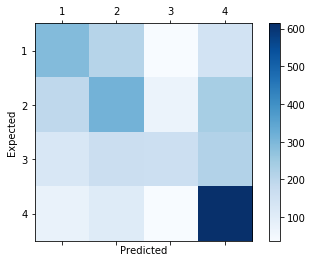

In [14]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['1', '2','3', '4']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()